# First attempt at using ML to understand what features predict the number of pathogens/parasites/insects on a plant. 

Tasks:
1. import data `"C:\Users\Seth\Dropbox\plant.db\bugs_v_stuff.csv"`
2. clean data
3. explore data
4. create a model to predict the number of pathogens/parasites/insects on a plant
5. evaluate model

In [131]:
# install seaborn
# %pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# Load the data
# df = pd.read_csv('C:\\Users\\Seth\\Dropbox\\plant.db\\final3.csv')
df_b = pd.read_csv('./data/insects.csv')  # note for Seth this is the same file as ~/Dropbox/plant.db/bugs_v_stuff.csv\n",
df_c = pd.read_csv('./data/Cval.csv')

In [133]:
# Y is the number of bugs `no_bugs` and the cval and X is potentially every other column
print(df_b.columns)
print(df_c.columns)


Index(['plant_no', 'leafP', 'leafP_val', 'plant_name.x.x', 'genus.x.x',
       'family.x.x', 'leafN', 'leafN_val', 'plant_name.y.x', 'genus.y.x',
       'family.y.x', 'plant_name', 'no_bugs', 'cl', 'clonality_state',
       'plant_name.x.y', 'genus.x.y', 'family.x.y', 'dicliny', 'dicliny_val',
       'plant_name.y.y', 'genus.y.y', 'family.y.y'],
      dtype='object')
Index(['plant_no', 'Cno', 'Cno_val', 'plant_name.x.x', 'genus.x.x',
       'family.x.x', 'long', 'long_code', 'long_val', 'plant_name.y.x',
       'genus.y.x', 'family.y.x', 'soil_nutr', 'soil_nutr_val', 'plant_name.x',
       'genus.x', 'family.x', 'leafP', 'leafP_val', 'plant_name.x.y',
       'genus.x.y', 'family.x.y', 'leafN', 'leafN_val', 'plant_name.y.y',
       'genus.y.y', 'family.y.y', 'plant_name.y', 'genus.y', 'family.y'],
      dtype='object')


In [134]:
# merge on plant_no
df = pd.merge(df_c, df_b, on='plant_no', how='outer')
print(df.columns)
# check dims
print(df_b.shape)
print(df_c.shape)
print(df.shape)

Index(['plant_no', 'Cno', 'Cno_val', 'plant_name.x.x_x', 'genus.x.x_x',
       'family.x.x_x', 'long', 'long_code', 'long_val', 'plant_name.y.x_x',
       'genus.y.x_x', 'family.y.x_x', 'soil_nutr', 'soil_nutr_val',
       'plant_name.x', 'genus.x', 'family.x', 'leafP_x', 'leafP_val_x',
       'plant_name.x.y_x', 'genus.x.y_x', 'family.x.y_x', 'leafN_x',
       'leafN_val_x', 'plant_name.y.y_x', 'genus.y.y_x', 'family.y.y_x',
       'plant_name.y', 'genus.y', 'family.y', 'leafP_y', 'leafP_val_y',
       'plant_name.x.x_y', 'genus.x.x_y', 'family.x.x_y', 'leafN_y',
       'leafN_val_y', 'plant_name.y.x_y', 'genus.y.x_y', 'family.y.x_y',
       'plant_name', 'no_bugs', 'cl', 'clonality_state', 'plant_name.x.y_y',
       'genus.x.y_y', 'family.x.y_y', 'dicliny', 'dicliny_val',
       'plant_name.y.y_y', 'genus.y.y_y', 'family.y.y_y'],
      dtype='object')
(1959, 23)
(652, 30)
(1989, 52)


In [136]:
Ycval = df['Cno_val']
Ybugs = df['no_bugs']
keep = ['plant_no', 'long_val', 'soil_nutr_val', 'leafP_val_x', 'leafN_val_x', 'clonality_state', 'dicliny_val', 'plant_name.y.y_y', 'genus.y.y_y', 'family.y.y_y']
X = df[keep]
print(X.columns)

Index(['plant_no', 'long_val', 'soil_nutr_val', 'leafP_val_x', 'leafN_val_x',
       'clonality_state', 'dicliny_val', 'plant_name.y.y_y', 'genus.y.y_y',
       'family.y.y_y'],
      dtype='object')


In [137]:
# rename columns: 'plant_name.y.y_y', 'genus.y.y_y', 'family.y.y_y' to 'plant_name', 'genus', 'family'
X = X.rename(columns={'plant_name.y.y_y': 'plant_name', 'genus.y.y_y': 'genus', 'family.y.y_y': 'family',  'leafP_val_x':'leafP_val', 'leafN_val_x':'leafN_val',})
print(X.columns)

Index(['plant_no', 'long_val', 'soil_nutr_val', 'leafP_val', 'leafN_val',
       'clonality_state', 'dicliny_val', 'plant_name', 'genus', 'family'],
      dtype='object')


Need to convert the value ranges to a reasonable quantity and then use a regression model to predict the number of pathogens/parasites/insects on a plant. Also want to recode the categorical variables to be numerical or at least ordinal. 

Make a table of the counts of the following variables: leafP_val, leafN_val,cl, clonality_state, dicliny, dicliny_val          

In [138]:
# make tables for counts of the different values of leafP_val, leafN_val,cl, clonality_state, dicliny, dicliny_val

# leafP_val
print(X['leafP_val'].value_counts())
# recode to low level of the range (except <1 set to 0.5 so it doesn't get confused with na) 1, 2, 3, 0.5
X['leafP_val'] = X['leafP_val'].replace({'1-2':1, '2-3':2, '>3':3, '<1':0.5})
print(X['leafP_val'].value_counts())

1-2    42
2-3    14
<1     10
>3      4
Name: leafP_val, dtype: int64
1.0    42
2.0    14
0.5    10
3.0     4
Name: leafP_val, dtype: int64


In [139]:
# leafN_val
print(X['leafN_val'].value_counts())
X['leafN_val'] = X['leafN_val'].replace({'5-10':5, '10-20':10, '20-30':20, '>30':30})
print(X['leafN_val'].value_counts())

10-20    42
20-30    22
>30       6
5-10      1
Name: leafN_val, dtype: int64
10.0    42
20.0    22
30.0     6
5.0      1
Name: leafN_val, dtype: int64


In [140]:
# clonality_state
print(X['clonality_state'].value_counts())

# If the value is of the following form, if NaN recode to 0, if matching below recode to 1, otherwise 2: "Little or no vegetative spread","Shortly creeping and rooting at nodes", "Shortly creeping stolons in illuminated medium", "Tip rooting (stems often turn downwards)", "Tussock forming graminoid", "Rhizome shortly creeping"
ones = ["Little or no vegetative spread","Shortly creeping and rooting at nodes", "Shortly creeping stolons in illuminated medium", "Tip rooting (stems often turn downwards)", "Tussock forming graminoid", "Rhizome shortly creeping"]
X['clonality_state'] = X['clonality_state'].replace(ones, 1)
X['clonality_state'] = X['clonality_state'].fillna(0)
print(X['clonality_state'].value_counts())

# if not 0 or 1, recode to 2
twos = X['clonality_state'].value_counts().index[2:]


Little or no vegetative spread                    1099
Rhizome far creeping                               215
Rhizome shortly creeping                           151
Tussock forming graminoid                          119
Extensively creeping and rooting at nodes           76
Irregularly fragmenting (mainly water plants)       35
Clones formed by suckering from roots               28
Tuberous or bulbous slowly cloning by offsets       26
Far creeping stolons in illuminated medium          26
Shortly creeping and rooting at nodes               21
Detaching ramets above ground, often axillary       18
Shortly creeping stolons in illuminated medium      15
Fragmenting as part of normal growth                 6
Tip rooting (stems often turn downwards)             3
Detaching ramets at or below ground                  3
Detaching ramets on prothallus (Trichomanes)         1
Name: clonality_state, dtype: int64
1                                                1408
Rhizome far creeping          

In [141]:
print(twos)
print(twos.shape)

twos = twos[1:]
# add "Rhizome far creeping" to twos
twos = twos.append(pd.Index(['Rhizome far creeping', 'Extensively creeping and rooting at nodes']))

print(twos)
X['clonality_state'] = X['clonality_state'].replace(twos, 2)


print(X['clonality_state'].value_counts())

Index([                                              0,
           'Extensively creeping and rooting at nodes',
       'Irregularly fragmenting (mainly water plants)',
               'Clones formed by suckering from roots',
       'Tuberous or bulbous slowly cloning by offsets',
          'Far creeping stolons in illuminated medium',
       'Detaching ramets above ground, often axillary',
                'Fragmenting as part of normal growth',
                 'Detaching ramets at or below ground',
        'Detaching ramets on prothallus (Trichomanes)'],
      dtype='object')
(10,)
Index(['Extensively creeping and rooting at nodes',
       'Irregularly fragmenting (mainly water plants)',
       'Clones formed by suckering from roots',
       'Tuberous or bulbous slowly cloning by offsets',
       'Far creeping stolons in illuminated medium',
       'Detaching ramets above ground, often axillary',
       'Fragmenting as part of normal growth',
       'Detaching ramets at or below ground

In [142]:
# soil_nutr_val
print(X['soil_nutr_val'].value_counts())
X['soil_nutr_val'] = X['soil_nutr_val'].replace({'very infertile':0, 'infertile':1, 'fertile':2, 'very fertile':3})
print(X['soil_nutr_val'].value_counts())

fertile           216
infertile         211
very infertile    130
very fertile       62
Name: soil_nutr_val, dtype: int64
2.0    216
1.0    211
0.0    130
3.0     62
Name: soil_nutr_val, dtype: int64


In [143]:
# diclyny_val
print(X['dicliny_val'].value_counts())
X['dicliny_val'] = X['dicliny_val'].replace({'dioecious':1, 'subandroecious':2, 'subdioecious':2, 'androdioecious':2, 'gynodioecious':2, 'gynomonoecious':3, 'andromonoecious':3, 'monoecious':3, 'gynoandromonoecious':3, 'hermaphrodite':4, 'polygamous':4, 'trioecious':4}) 
print(X['dicliny_val'].value_counts())


hermaphrodite          1228
monoecious              150
gynodioecious           128
gynomonoecious          119
dioecious                70
andromonoecious          45
androdioecious           13
polygamous                7
gynoandromonoecious       4
trioecious                3
subdioecious              1
subandroecious            1
Name: dicliny_val, dtype: int64
4.0    1238
3.0     318
2.0     143
1.0      70
Name: dicliny_val, dtype: int64


In [144]:
# table of long_val
print(X['long_val'].value_counts())
# convert <1 to 0.5, 1-2 to 1, 2-10 to 2, 10-100 to 10, 100-500 to 100, >500 to 500
X['long_val'] = X['long_val'].replace({'<1':0.5, '1-2':1, '2-10':2, '10-100':10, '100-500':100, '>500':500})
print(X['long_val'].value_counts())

<1         457
100-500     16
10-100      12
2-10         9
1-2          2
>500         2
Name: long_val, dtype: int64
0.5      457
100.0     16
10.0      12
2.0        9
500.0      2
1.0        2
Name: long_val, dtype: int64


In [145]:
# summarize the data: how many rows have data for the Y column that are not NaN
# print head of the data
print(X.shape)
print(Ycval.shape)
print(Ybugs.shape)

print(Ycval.head())
print(Ybugs.head())
print(X.head())

(1989, 10)
(1989,)
(1989,)
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Cno_val, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: no_bugs, dtype: float64
   plant_no  long_val  soil_nutr_val  leafP_val  leafN_val  clonality_state  \
0      2031       NaN            1.0        NaN        NaN                0   
1      2036       NaN            1.0        NaN        NaN                0   
2      2091       NaN            NaN        NaN        NaN                0   
3    463411       NaN            2.0        NaN        NaN                0   
4   2001001       NaN            1.0        NaN        NaN                1   

   dicliny_val plant_name genus family  
0          NaN        NaN   NaN    NaN  
1          NaN        NaN   NaN    NaN  
2          NaN        NaN   NaN    NaN  
3          NaN        NaN   NaN    NaN  
4          NaN        NaN   NaN    NaN  


In [146]:
# save the file for X
print(X.shape)
print(Ycval.shape)
print(Ybugs.shape)

X['Cval'] = Ycval
X['No_bugs'] = Ybugs

df_cleaned = X.drop_duplicates()

# Print the cleaned DataFrame
print("\nDataFrame after Removing Duplicates:")
print(df_cleaned) #dropped 25 rows



(1989, 10)
(1989,)
(1989,)

DataFrame after Removing Duplicates:
        plant_no  long_val  soil_nutr_val  leafP_val  leafN_val  \
0           2031       NaN            1.0        NaN        NaN   
1           2036       NaN            1.0        NaN        NaN   
2           2091       NaN            NaN        NaN        NaN   
3         463411       NaN            2.0        NaN        NaN   
4        2001001       NaN            1.0        NaN        NaN   
...          ...       ...            ...        ...        ...   
1984  2030240140       NaN            NaN        NaN        NaN   
1985  2030240180       NaN            NaN        NaN        NaN   
1986  2030300010       NaN            NaN        NaN        NaN   
1987  2030300160       NaN            NaN        NaN        NaN   
1988  2030300190       NaN            NaN        NaN        NaN   

      clonality_state  dicliny_val          plant_name   genus       family  \
0                   0          NaN                 

In [147]:
# # drop cases where there are no plant name info
# filtered_list_bugs = [x for x in df_cleaned['genus'] if not pd.isna(x)]

# Use the filtered list to subset the DataFrame
# Assuming the list corresponds to the index of the DataFrame
# Create a boolean mask where the original list is not NaN
mask = ~pd.isna(df_cleaned['genus'])

# Apply the mask to the DataFrame to keep corresponding rows
df_cleaned = df_cleaned[mask]

# Display the filtered DataFrame and list
print(df_cleaned)


        plant_no  long_val  soil_nutr_val  leafP_val  leafN_val  \
31     260070070     100.0            0.0        1.0       10.0   
32     280050020     100.0            0.0        1.0       10.0   
33     290010010     500.0            3.0        1.0       10.0   
34     310010590       NaN            1.0        NaN        NaN   
35     310020020       NaN            NaN        NaN        NaN   
...          ...       ...            ...        ...        ...   
1984  2030240140       NaN            NaN        NaN        NaN   
1985  2030240180       NaN            NaN        NaN        NaN   
1986  2030300010       NaN            NaN        NaN        NaN   
1987  2030300160       NaN            NaN        NaN        NaN   
1988  2030300190       NaN            NaN        NaN        NaN   

      clonality_state  dicliny_val           plant_name      genus  \
31                  1          3.0     PINUS SYLVESTRIS      PINUS   
32                  1          1.0   JUNIPERUS COMMUNIS

In [148]:
# write df out as csv
# Save DataFrame to CSV
df_cleaned.to_csv('./data/cleaned_20240729', index=False)

In [17]:
# make model and fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# note, some columns are not useful. 
print(X.columns)

Index(['plant_no', 'long_val', 'soil_nutr_val', 'leafP_val', 'leafN_val',
       'clonality_state', 'dicliny_val', 'plant_name', 'genus', 'family'],
      dtype='object')


In [22]:
print(X.head())

   plant_no  long_val  soil_nutr_val  leafP_val  leafN_val  clonality_state  \
0      2031       NaN            1.0        NaN        NaN                0   
1      2036       NaN            1.0        NaN        NaN                0   
2      2091       NaN            NaN        NaN        NaN                0   
3    463411       NaN            2.0        NaN        NaN                0   
4   2001001       NaN            1.0        NaN        NaN                1   

   dicliny_val plant_name genus family  
0          NaN        NaN   NaN    NaN  
1          NaN        NaN   NaN    NaN  
2          NaN        NaN   NaN    NaN  
3          NaN        NaN   NaN    NaN  
4          NaN        NaN   NaN    NaN   0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Cno_val, dtype: float64


In [33]:
# how many Ycval have value
#  Filter out the NaN values from the list
filtered_list_cval = [x for x in Ycval if not pd.isna(x)]

# Use the filtered list to subset the DataFrame
# Assuming the list corresponds to the index of the DataFrame
# Create a boolean mask where the original list is not NaN
mask = ~pd.isna(Ycval)

# Apply the mask to the DataFrame to keep corresponding rows
filtered_df = X[mask]

# Display the filtered DataFrame and list
print(filtered_list_cval)
print(filtered_df)

filtered_df.shape


[1.1, 1.1, 0.8, 2.9, 6.48, 2.5, 1.2, 4.4, 1.5, 1.5, 18.6, 33.0, 38.1, 9.0, 2.2, 5.2, 3.9, 0.5, 0.5, 1.4, 3.3, 3.3, 4.1, 4.1, 4.1, 1.6, 1.0, 1.8, 23.8, 1.7, 1.6, 14.4, 20.7, 1.6, 1.1, 1.0, 4.7, 2.2, 4.5, 3.3, 0.7, 3.6, 1.9, 1.7, 1.6, 9.5, 9.5, 9.5, 2.4, 2.4, 2.4, 2.0, 2.0, 5.46, 6.5, 1.3, 3.2, 2.3, 7.9, 2.3, 2.3, 21.1, 28.6, 5.5, 2.3, 2.3, 2.3, 3.9, 5.3, 7.8, 14.7, 19.0, 6.1, 4.6, 2.59, 6.0, 3.1, 2.4, 7.9, 141.4, 42.4, 49.3, 13.5, 9.8, 8.7, 8.7, 5.5, 16.9, 3.3, 23.9, 24.0, 27.0, 20.9, 2.3, 32.7, 22.4, 27.5, 10.1, 16.0, 9.3, 4.7, 18.0, 12.1, 11.8, 7.8, 2.3, 11.7, 7.9, 2.3, 5.9, 4.6, 4.2, 1.1, 1.3]
       plant_no  long_val  soil_nutr_val  leafP_val  leafN_val  \
39    340020020     100.0            2.0        1.0       20.0   
40    340020020     100.0            2.0        1.0       20.0   
43    360010010     100.0            2.0        2.0       20.0   
48    400010020       0.5            2.0        3.0       30.0   
57    470040010       0.5            2.0        3.0       20.0   
.

(114, 10)

Model the cvalue according to following variables: long_val, soil_nutr_val, leafP_val, leafN_val, clonality_state, dicliny_val, genus, family.

In [30]:
print(f'There are {filtered_df.shape[0]} cases for which we have Cvalue')


There are 114 cases for which we have Cvalue


In [32]:
print(f'There are {filtered_df_bugs.shape[0]} cases for which we have number of bugs')


There are 946 cases for which we have number of bugs


In [100]:
# fit the model
indepVar = ['leafP_val', 'leafN_val', 'clonality_state', 'dicliny_val', 'soil_nutr_val', 'long_val']


In [53]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_df[indepVar], filtered_list_cval, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print feature importances
print("Feature Importances:", model.feature_importances_)
print("The features are:", indepVar)


Mean Squared Error: 253.08849878300688
Feature Importances: [0.05938289 0.05224694 0.06788362 0.34458026 0.16537881 0.31052747]
The features are: ['leafP_val', 'leafN_val', 'clonality_state', 'dicliny_val', 'soil_nutr_val', 'long_val']


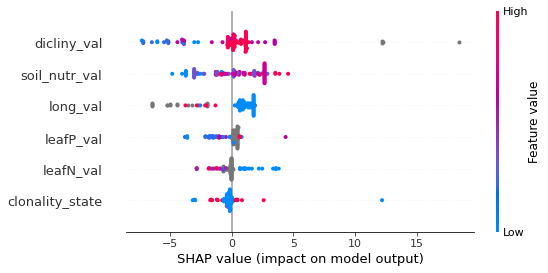

In [41]:
# !pip install shap
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(filtered_df[indepVar])
shap.summary_plot(shap_values, filtered_df[indepVar])

# from sklearn.inspection import plot_partial_dependence
# plot_partial_dependence(model, X_test, indepVar)


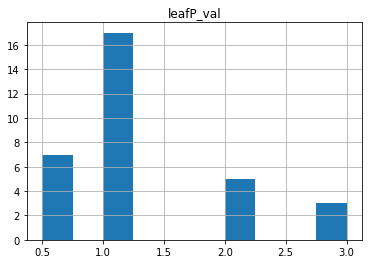

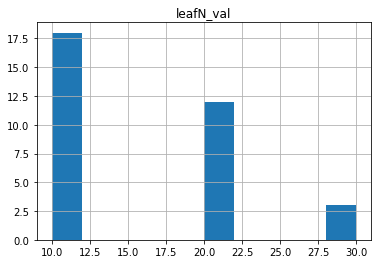

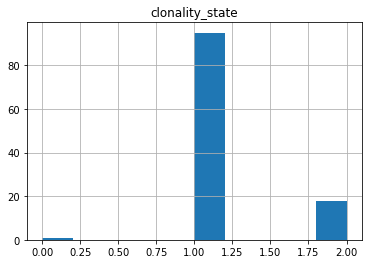

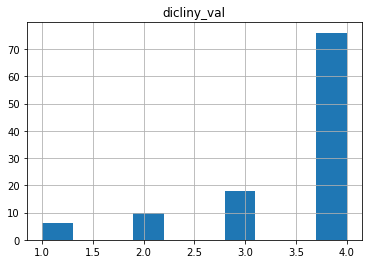

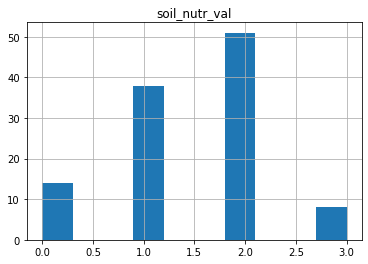

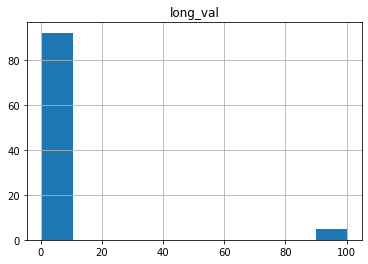

In [42]:
# check for outliers in these both independent vars and y vals

for var in indepVar:
    filtered_df.hist(var)
    plt.show()

In [58]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# !pip install xgboost

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


# Create a pipeline with KNN imputer and standard scaler
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),  # You can adjust the number of neighbors
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Extract the model from the pipeline
model_n = pipeline.named_steps['model']
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Cross-validation scores
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE:", -scores.mean())


Mean Squared Error: 268.2199897803378
Cross-validation MSE: 283.854595328663


In [61]:
# Print feature importances
print("Feature Importances:", model_n.feature_importances_)
print("The features are:", indepVar)

# the un normalized model results are
print("Feature Importances: ", model.feature_importances_)


Feature Importances: [0.18278208 0.13505016 0.1589712  0.26690438 0.11111665 0.14517553]
The features are: ['leafP_val', 'leafN_val', 'clonality_state', 'dicliny_val', 'soil_nutr_val', 'long_val']
Feature Importances:  [0.05938289 0.05224694 0.06788362 0.34458026 0.16537881 0.31052747]


You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.


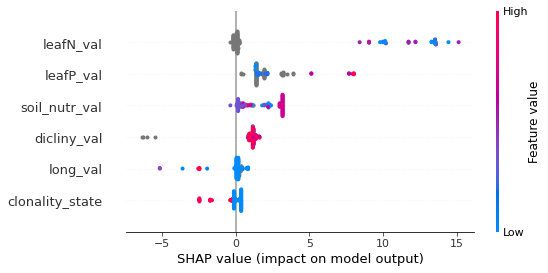

In [60]:
explainer_n = shap.Explainer(model_n)
shap_values_n = explainer_n.shap_values(filtered_df[indepVar])
shap.summary_plot(shap_values_n, filtered_df[indepVar])

# note, asks to update to xgboost 1.6 or higher. 

In [62]:
# plot each normalized independent variable vs y normalized
imputed_data = pipeline.named_steps['imputer']
scaled_data = pipeline.named_steps['scaler']

In [64]:
print(imputed_data)
print(scaled_data)

KNNImputer(n_neighbors=3)
StandardScaler()


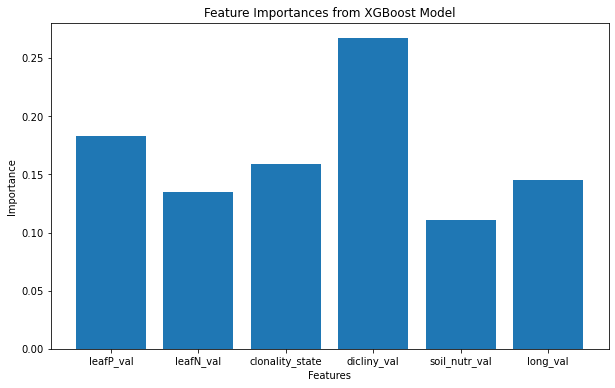

In [65]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(indepVar, model_n.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from XGBoost Model')
plt.show()


Above fails because of NaN values in the data. Need to clean the data first. or use a model that can handle NaN values, e.g. Random Forest or sklearn.ensemble.HistGradientBoostingClassifier

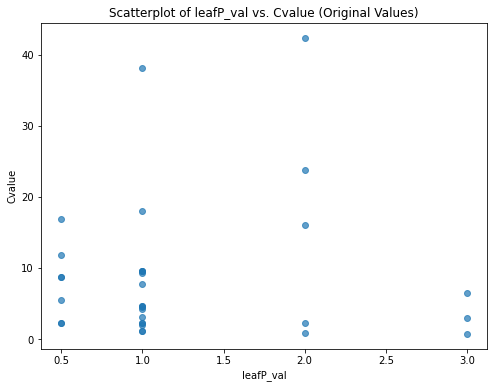

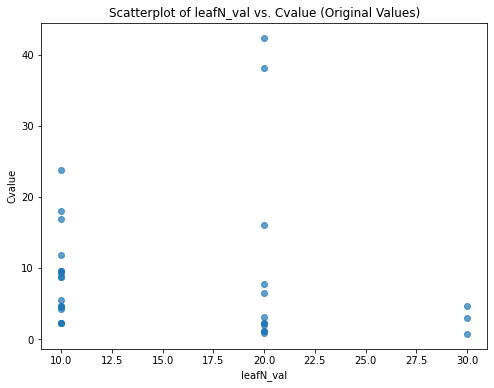

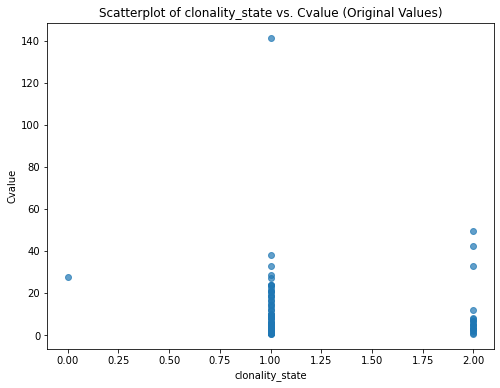

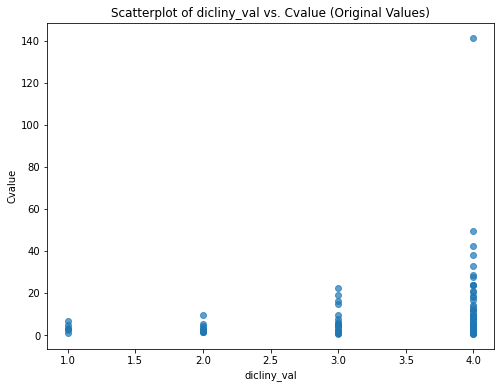

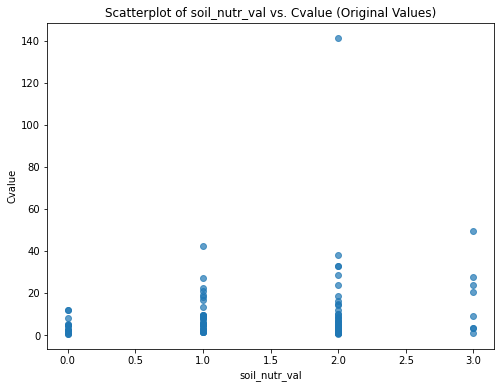

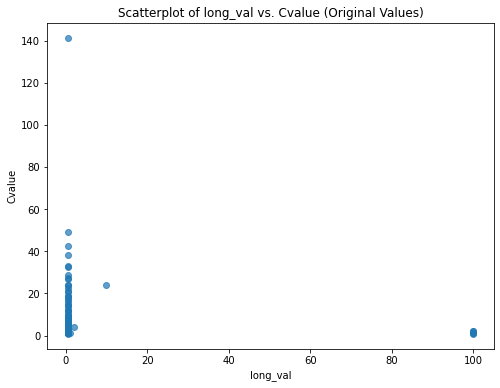

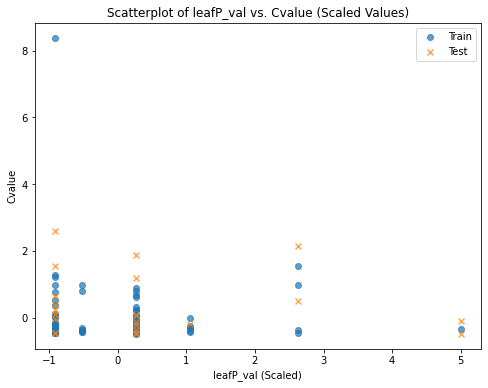

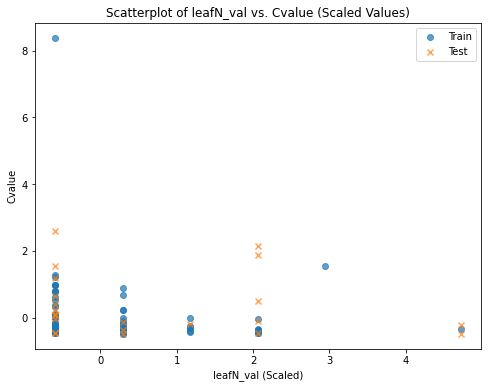

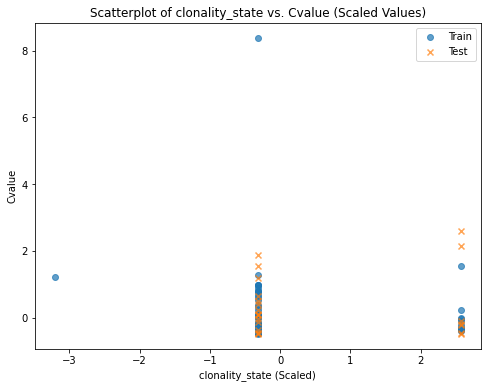

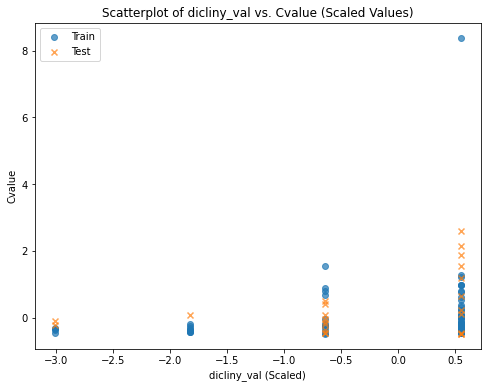

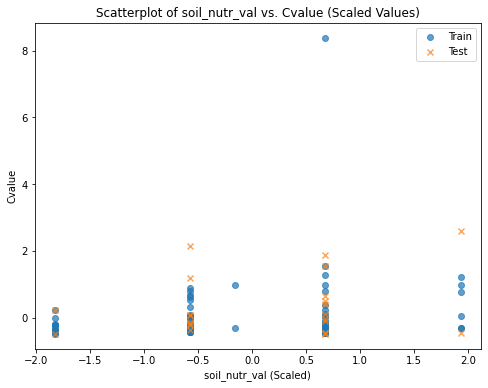

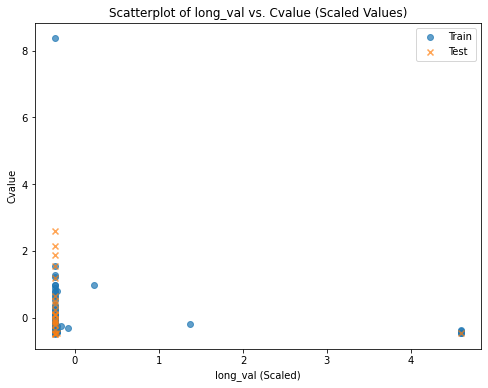

In [74]:
# # Create scatterplots for each independent variable vs. the target variable
# for var in indepVar:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(filtered_df[var], filtered_list_cval, alpha=0.7)
#     plt.xlabel(var)
#     plt.ylabel('Cvalue')
#     plt.title(f'Scatterplot of {var} vs. Cvalue')
#     plt.show()

# Transform the data using the fitted pipeline (excluding the model step)
X_train_scaled = pipeline.named_steps['scaler'].transform(pipeline.named_steps['imputer'].transform(X_train))
X_test_scaled = pipeline.named_steps['scaler'].transform(pipeline.named_steps['imputer'].transform(X_test))

# Convert scaled arrays to DataFrame for easier plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=indepVar)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=indepVar)

# Convert y_train and y_test to NumPy arrays
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Scale the target variable using StandardScaler
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=['Cvalue'])
y_test_scaled_df = pd.DataFrame(y_test_scaled, columns=['Cvalue'])


# Plot scatterplots for each independent variable vs. the target variable (original values)
for var in indepVar:
    plt.figure(figsize=(8, 6))
    plt.scatter(filtered_df[var], filtered_list_cval, alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('Cvalue')
    plt.title(f'Scatterplot of {var} vs. Cvalue (Original Values)')
    plt.show()

# Plot scatterplots for each independent variable vs. the target variable (scaled values)
for var in indepVar:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_scaled_df[var], y_train_scaled_df['Cvalue'], alpha=0.7, label='Train')
    plt.scatter(X_test_scaled_df[var], y_test_scaled_df['Cvalue'], alpha=0.7, label='Test', marker='x')
    plt.xlabel(f'{var} (Scaled)')
    plt.ylabel('Cvalue')
    plt.title(f'Scatterplot of {var} vs. Cvalue (Scaled Values)')
    plt.legend()
    plt.show()


In [76]:
from scipy.stats import zscore

# Calculate Z-scores for the target variable
df = filtered_df
df['Cvalue'] = Ycval

df['Cvalue_zscore'] = zscore(df['Cvalue'])

# Identify outliers (e.g., Z-score > 3 or < -3)
outliers = df[np.abs(df['Cvalue_zscore']) > 3]
print(outliers)




       plant_no  long_val  soil_nutr_val  leafP_val  leafN_val  \
588  1830230010       0.5            2.0        NaN        NaN   

     clonality_state  dicliny_val             plant_name        genus  \
588                1          4.0  FRITILLARIA MELEAGRIS  FRITILLARIA   

        family  Cvalue_zscore  Cvalue  
588  LILIACEAE       8.423459   141.4  



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [77]:
# Remove outliers from the DataFrame
df_cleaned = df[np.abs(df['Cvalue_zscore']) <= 3]

# Drop the Z-score column as it's no longer needed
df_cleaned = df_cleaned.drop(columns=['Cvalue_zscore'])


In [90]:
df_cleaned['log_long_val'] = np.log(df_cleaned['long_val'])
print(df_cleaned['long_val'].head)
print(df_cleaned['log_long_val'].head)

<bound method NDFrame.head of 39     100.0
40     100.0
43     100.0
48       0.5
57       0.5
       ...  
671      0.5
672      0.5
673      2.0
684      1.0
686      NaN
Name: long_val, Length: 113, dtype: float64>
<bound method NDFrame.head of 39     4.605170
40     4.605170
43     4.605170
48    -0.693147
57    -0.693147
         ...   
671   -0.693147
672   -0.693147
673    0.693147
684    0.000000
686         NaN
Name: log_long_val, Length: 113, dtype: float64>


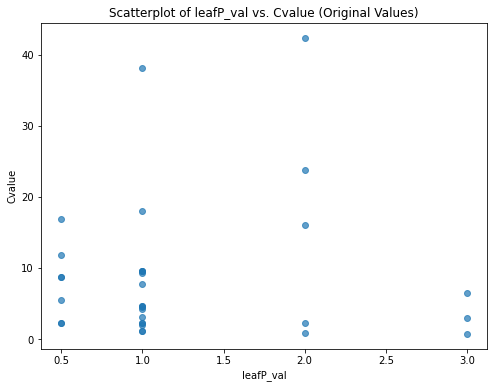

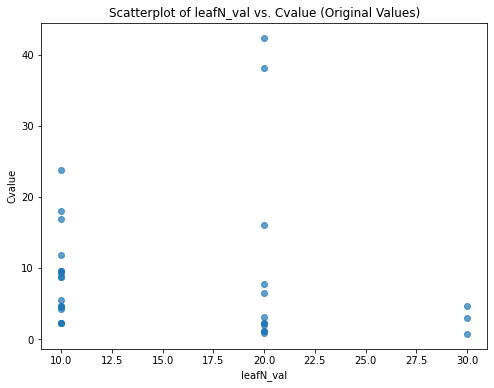

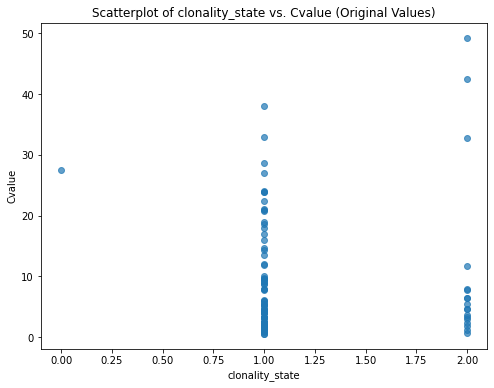

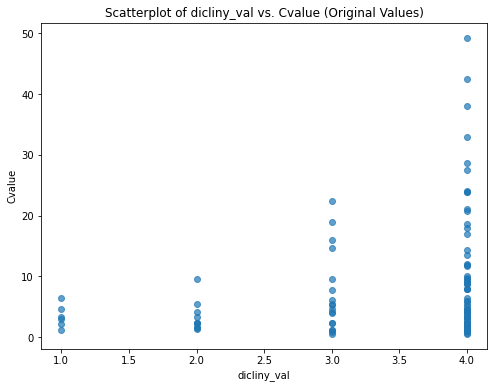

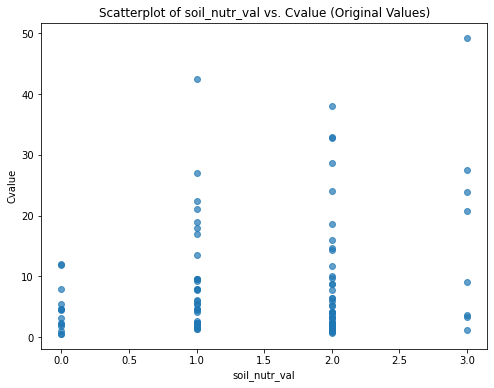

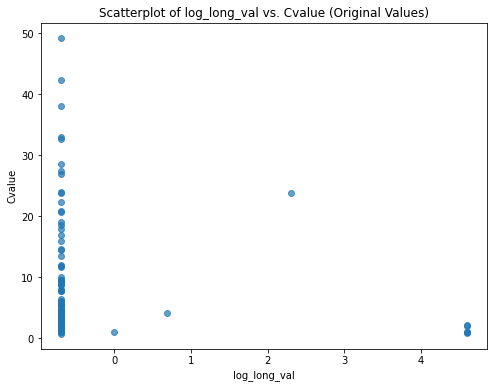

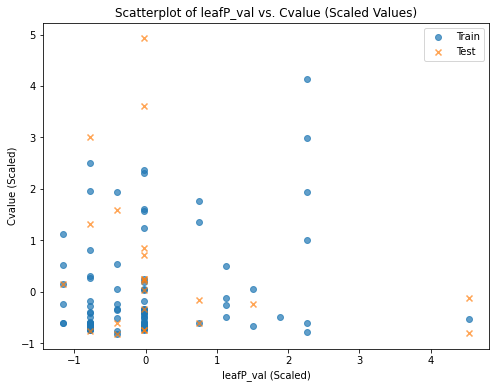

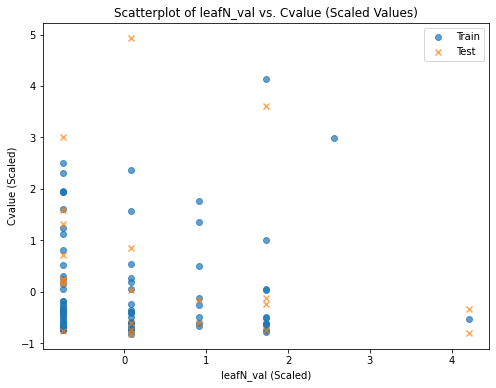

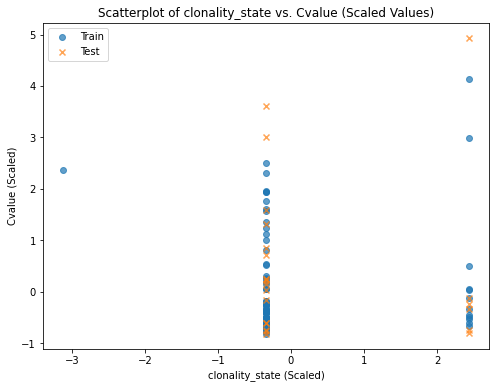

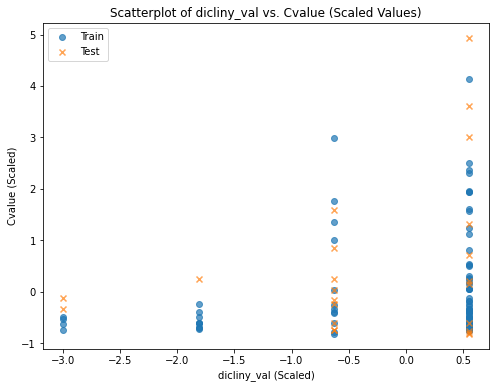

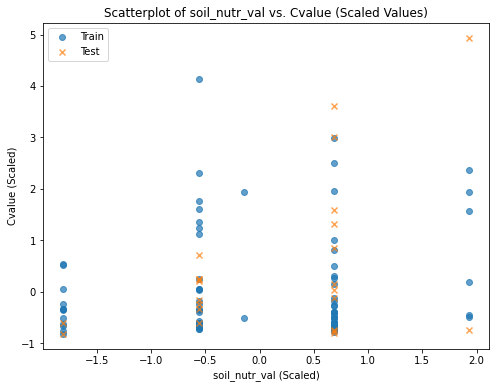

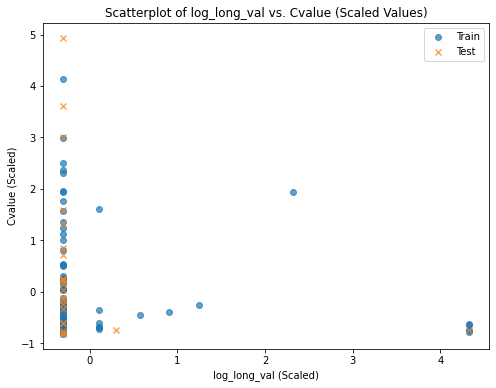

In [91]:

indepVar = ['leafP_val', 'leafN_val', 'clonality_state', 'dicliny_val', 'soil_nutr_val', 'log_long_val']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[indepVar], df_cleaned['Cvalue'], test_size=0.2, random_state=42)

# Create a pipeline with KNN imputer and standard scaler for independent variables
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)),  # You can adjust the number of neighbors
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Transform the data using the fitted pipeline (excluding the model step)
X_train_scaled = pipeline.named_steps['scaler'].transform(pipeline.named_steps['imputer'].transform(X_train))
X_test_scaled = pipeline.named_steps['scaler'].transform(pipeline.named_steps['imputer'].transform(X_test))

# Convert y_train and y_test to NumPy arrays
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Scale the target variable using StandardScaler
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Convert scaled arrays to DataFrame for easier plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=indepVar)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=indepVar)
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=['Cvalue'])
y_test_scaled_df = pd.DataFrame(y_test_scaled, columns=['Cvalue'])

# Plot scatterplots for each independent variable vs. the target variable (original values)
for var in indepVar:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_cleaned[var], df_cleaned['Cvalue'], alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('Cvalue')
    plt.title(f'Scatterplot of {var} vs. Cvalue (Original Values)')
    plt.show()

# Plot scatterplots for each independent variable vs. the target variable (scaled values)
for var in indepVar:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_scaled_df[var], y_train_scaled_df['Cvalue'], alpha=0.7, label='Train')
    plt.scatter(X_test_scaled_df[var], y_test_scaled_df['Cvalue'], alpha=0.7, label='Test', marker='x')
    plt.xlabel(f'{var} (Scaled)')
    plt.ylabel('Cvalue (Scaled)')
    plt.title(f'Scatterplot of {var} vs. Cvalue (Scaled Values)')
    plt.legend()
    plt.show()


In [92]:

# Extract the model from the pipeline
model_n = pipeline.named_steps['model']
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Cross-validation scores
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE:", -scores.mean())


Mean Squared Error: 183.99411072681548
Cross-validation MSE: 119.59053641980321


In [94]:
# Print feature importances
print("Feature Importances:", model_n.feature_importances_)
print("The features are:", indepVar)

# # the un normalized model results are
# print("Feature Importances: ", model.feature_importances_)


Feature Importances: [0.2394526  0.07870344 0.16192949 0.13549425 0.12404139 0.26037878]
The features are: ['leafP_val', 'leafN_val', 'clonality_state', 'dicliny_val', 'soil_nutr_val', 'log_long_val']


You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.


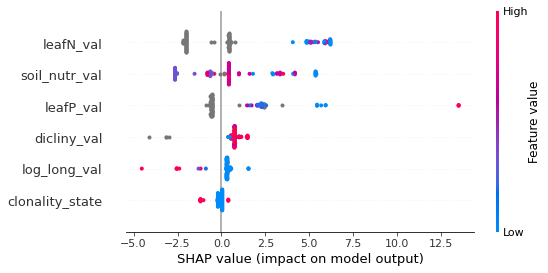

In [95]:
explainer_n = shap.Explainer(model_n)
shap_values_n = explainer_n.shap_values(df_cleaned[indepVar])
shap.summary_plot(shap_values_n, df_cleaned[indepVar])

# note, asks to update to xgboost 1.6 or higher. 

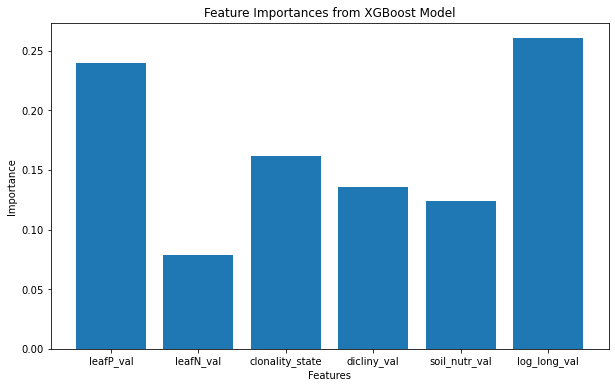

In [96]:
# plot each normalized independent variable vs y normalized
imputed_data = pipeline.named_steps['imputer']
scaled_data = pipeline.named_steps['scaler']
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(indepVar, model_n.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from XGBoost Model')
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
# Predictions
y_pred = model.predict(X_test)

def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - n_features - 1))
    return adj_r2
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2_score(y_test, y_pred, X_test.shape[1])
explained_variance = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Explained Variance Score: {explained_variance}")
print(f"Mean Absolute Percentage Error: {mape}%")


Mean Squared Error: 169.52442198859953
Root Mean Squared Error: 13.020154453331171
Mean Absolute Error: 9.125260099172591
R-squared: -0.06630763053166144
Adjusted R-squared: -0.46617299198103446
Explained Variance Score: -0.04254067660391225
Mean Absolute Percentage Error: 318.73418521121494%
